<h1>Project: Wrangle and analyze data </h1>

<p>The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.  </p>

In [1]:
import numpy as np
import pandas as pd
import tweepy as tw #API Tweeter
import requests
import os

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import matplotlib

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

<h1>Phase 1: Gather the data </h1>

<h3>Definition: Define the objectives </h3>

<li>
<ul> Download the archive</ul>
<ul>Download the additional data via Tweepy </ul>
<ul>Consolidate the data for the next step </ul>
</li>

<h1>Read the csv archive file</h1>

In [3]:
df = pd.read_csv('twitter-archive-enhanced.csv' , encoding ='utf-8' , sep=',')
df.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                             source                                               text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                      expanded_urls  rating_numerator  rating_denominator     name doggo floofer pupper puppo
0  892420643555336193                    NaN                  NaN  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" r...  This is Phineas. He's a mystical boy. Only eve...                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/892420643...                13                  10  Phineas  None    None   None  None
1  892177421306343426                    NaN                  NaN  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" r...  This is Tilly. She's just checking pup on you....                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/892177421...                13                  10    Tilly  None    None   None  None
2  891815181378084864                    NaN                  NaN  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" r...  This is Archie. He is a rare Norwegian Pouncin...                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/891815181...                12                  10   Archie  None    None   None  None

<h1>Download programmatically the file from the url</h1>

<h3>Code: implement the steps  </h3>

In [4]:
# Make directory if it doesn't already exist
folder_name = 'dog_ratings'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [5]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode ='wb') as file:
     file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
df_pred = pd.read_csv(folder_name+"/"'image-predictions.tsv', sep='	')
df_pred.sample(3)

tweet_id                                          jpg_url  img_num          p1   p1_conf  p1_dog                      p2   p2_conf  p2_dog             p3   p3_conf  p3_dog
2067  890729181411237888  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg        2  Pomeranian  0.566142    True              Eskimo_dog  0.178406    True       Pembroke  0.076507    True
35    666437273139982337  https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg        1   Chihuahua  0.671853    True                  beagle  0.124680    True         Saluki  0.044094    True
164   668975677807423489  https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg        1      basset  0.605437    True  Welsh_springer_spaniel  0.184783    True  Saint_Bernard  0.116299    True

<h3>Fetching data from Tweeter</h3>

In [8]:
#consumer_key= 'yourkeyhere'
#consumer_secret= 'yourkeyhere'

consumer_key = 'gVctStkiNVGRZVODXoD6ArBOU'

consumer_secret ='wCRLAlmCtA1InfqbNpsH54BVitMH1EYltwjl7a2CD4rn8ATy6E'

access_token= '3338026065-ELz2REKz16xxogbWDDmeq77btntm1x0OnYNNsca'
access_token_secret= 'rRjTTxHORIiyH81ncNwQLZyHeerg9bcMuAZH0k4MzBNzX'

In [9]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
api

<h2>Test Api</h2>

In [10]:
# Define the search term and the date_since date as variables
#search_words = "#wildfires"
search_words = "@dog_rates"
date_since = "2017-08-01"

In [11]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(50)
tweets

In [12]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

@BarrStar11 @KasidyShepler @dog_rates But she's trying so hard!
RT @dog_rates: Our list of 15/10s has been pupdated to include Rusty. I suggest waiting until you’re alone to look through the others
https…
RT @dog_rates: This is Skye. She was thrown from a moving vehicle and abandoned as a puppy. She ended up losing her front right leg and her…
RT @dog_rates: This is Skye. She was thrown from a moving vehicle and abandoned as a puppy. She ended up losing her front right leg and her…
RT @VancityReynolds: @dog_rates @sbh_winnipeg Rusty, you were a good dog. ❤️
RT @dog_rates: This is Skye. She was thrown from a moving vehicle and abandoned as a puppy. She ended up losing her front right leg and her…
RT @BarrStar11: Doggo school dropout 30 mins into class #2 @KasidyShepler @dog_rates https://t.co/BPDw6X0EZ9
RT @dog_rates: This is Skye. She was thrown from a moving vehicle and abandoned as a puppy. She ended up losing her front right leg and her…
RT @dog_rates: Our list of 15/10s has been pu

<h2>Tweeter API</h2>

In [13]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
df_1 = df.copy()
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [14]:
with open('tweet_json.txt') as file:
    status = []
    count = 0
    for line in file:
        print(count)
        status.append(json.loads(line))
        count = count +1
print('read terminated')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
read terminated


In [15]:
status

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [16]:
df_api =  pd.DataFrame(status)
    

In [17]:
df_api

created_at                  id              id_str                                          full_text  truncated display_text_range                                           entities                                  extended_entities                                             source  in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id in_reply_to_user_id_str in_reply_to_screen_name                                               user   geo coordinates place contributors  is_quote_status  retweet_count  favorite_count  favorited  retweeted possibly_sensitive possibly_sensitive_appealable lang retweeted_status  quoted_status_id quoted_status_id_str quoted_status_permalink quoted_status
0     Tue Aug 01 16:23:56 +0000 2017  892420643555336193  892420643555336193  This is Phineas. He's a mystical boy. Only eve...      False            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 892420639486877696, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                      None                  NaN                    None                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...  None        None  None         None            False           7789           36596      False      False              False                         False   en              NaN               NaN                  NaN                     NaN           NaN
1     Tue Aug 01 00:17:27 +0000 2017  892177421306343426  892177421306343426  This is Tilly. She's just checking pup on you....      False           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 892177413194625024, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                      None                  NaN                    None                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...  None        None  None         None            False           5769           31531      False      False              False                         False   en              NaN               NaN                  NaN                     NaN           NaN
2     Mon Jul 31 00:18:03 +0000 2017  891815181378084864  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...      False           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 891815175371796480, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                      None                  NaN                    None                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...  None        None  None         None            False           3818           23756      False      False              False                         False   en              NaN               NaN                  NaN                     NaN           NaN
3     Sun Jul 30 15:58:51 +0000 2017  891689557279858688  891689557279858688  This is Darla. She commenced a snooze mid meal...      False            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 891689552724799489, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                      None                  NaN                    None                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...  None        None  None         None            False           7960           39918      False      False              False                         False   en              NaN               NaN                  NaN                     NaN           NaN
4     Sat Jul 29 16:00:24 +0000 2017  891327558926688256  891327558926688256  This is Franklin. He would like you to stop ca...      False           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...  {'media': [{'id': 891327551943041024, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                  

In [18]:
df_api.shape

(2331, 32)

<h3>Test:  test and verify  </h3>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [22]:
#df.to_csv('df.csv', index=False)
#df_api.to_csv('df_api.csv', index=False)
#df_pred.to_csv('df_pred.csv', index=False)

<h2> Reloading if necessary </h2>

In [6]:
df = pd.read_csv('df.csv')
df_pred = pd.read_csv('df_pred.csv')
df_api = pd.read_csv('df_api.csv')
#read to avoid query the twitter api
print('frames reloaded')

frames reloaded


<h1>Phase 2: Assess the data programmatically </h1>

<h3>Define</h3>

<ul>
<li>Assess the tidiness of the sets</li>
<li>Assess data quality issues: missing values, types, consistence, duplicates</li>
<li>Summarize the relevant issues before the cleaning phase</li>
</ul>

<p>
Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.
</p>

<h3>Code </h3>

In [7]:
df.sample(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                             source                                               text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                      expanded_urls  rating_numerator  rating_denominator name doggo floofer pupper puppo
1368  702539513671897089                    NaN                  NaN  2016-02-24 17:04:07 +0000  <a href="http://twitter.com/download/iphone" r...  This is a Wild Tuscan Poofwiggle. Careful not ...                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/702539513...                12                  10    a  None    None   None  None

In [8]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [9]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [10]:
df.duplicated().sum()

0

In [11]:
df_pred.sample()

tweet_id                                          jpg_url  img_num           p1   p1_conf  p1_dog      p2  p2_conf  p2_dog        p3   p3_conf  p3_dog
1896  850145622816686080  https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg        2  tennis_ball  0.714798   False  kelpie  0.10539    True  malinois  0.058553    True

In [12]:
df_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [13]:
df_pred.duplicated().sum()

0

In [14]:
df_api.sample(3)

created_at                  id              id_str                                          full_text  truncated display_text_range                                           entities                                  extended_entities                                             source  in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str in_reply_to_screen_name                                               user  geo  coordinates place  contributors  is_quote_status  retweet_count  favorite_count  favorited  retweeted possibly_sensitive possibly_sensitive_appealable lang retweeted_status  quoted_status_id  quoted_status_id_str quoted_status_permalink quoted_status
1555  Wed Jan 13 16:36:55 +0000 2016  687312378585812992  687312378585812992  "You got any games on your phone" 7/10 for inv...      False            [0, 98]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 687312369295486976, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN                     NaN  {'id': 4196983835, 'id_str': '4196983835', 'na...  NaN          NaN   NaN           NaN            False           1914            4395      False      False              False                         False   en              NaN               NaN                   NaN                     NaN           NaN
2044  Mon Nov 30 01:10:04 +0000 2015  671134062904504320  671134062904504320  Say hello to Clarence. He's a western Alkaline...      False           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 671134054696296448, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN                     NaN  {'id': 4196983835, 'id_str': '4196983835', 'na...  NaN          NaN   NaN           NaN            False            187             727      False      False              False                         False   en              NaN               NaN                   NaN                     NaN           NaN
1119  Tue May 03 01:50:44 +0000 2016  727314416056803329  727314416056803329  This pupper was about to explain where that di...      False            [0, 93]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 727314408490168320, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN                     NaN  {'id': 4196983835, 'id_str': '4196983835', 'na...  NaN          NaN   NaN           NaN            False            748            3356      False      False              False                         False   en              NaN               NaN                   NaN                     NaN           NaN

In [15]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null int64
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null float64
coordinates                      0 non-nu

<h2>Assessing the types </h2>

In [16]:
for i, v in enumerate(df.columns):
    print(i, v , type(v))

0 tweet_id <class 'str'>
1 in_reply_to_status_id <class 'str'>
2 in_reply_to_user_id <class 'str'>
3 timestamp <class 'str'>
4 source <class 'str'>
5 text <class 'str'>
6 retweeted_status_id <class 'str'>
7 retweeted_status_user_id <class 'str'>
8 retweeted_status_timestamp <class 'str'>
9 expanded_urls <class 'str'>
10 rating_numerator <class 'str'>
11 rating_denominator <class 'str'>
12 name <class 'str'>
13 doggo <class 'str'>
14 floofer <class 'str'>
15 pupper <class 'str'>
16 puppo <class 'str'>


In [17]:
for i, v in enumerate(df_api.columns):
    print(i, v , type(v))

0 created_at <class 'str'>
1 id <class 'str'>
2 id_str <class 'str'>
3 full_text <class 'str'>
4 truncated <class 'str'>
5 display_text_range <class 'str'>
6 entities <class 'str'>
7 extended_entities <class 'str'>
8 source <class 'str'>
9 in_reply_to_status_id <class 'str'>
10 in_reply_to_status_id_str <class 'str'>
11 in_reply_to_user_id <class 'str'>
12 in_reply_to_user_id_str <class 'str'>
13 in_reply_to_screen_name <class 'str'>
14 user <class 'str'>
15 geo <class 'str'>
16 coordinates <class 'str'>
17 place <class 'str'>
18 contributors <class 'str'>
19 is_quote_status <class 'str'>
20 retweet_count <class 'str'>
21 favorite_count <class 'str'>
22 favorited <class 'str'>
23 retweeted <class 'str'>
24 possibly_sensitive <class 'str'>
25 possibly_sensitive_appealable <class 'str'>
26 lang <class 'str'>
27 retweeted_status <class 'str'>
28 quoted_status_id <class 'str'>
29 quoted_status_id_str <class 'str'>
30 quoted_status_permalink <class 'str'>
31 quoted_status <class 'str'>


In [18]:
for i, v in enumerate(df_pred.columns):
    print(i, v , type(v))

0 tweet_id <class 'str'>
1 jpg_url <class 'str'>
2 img_num <class 'str'>
3 p1 <class 'str'>
4 p1_conf <class 'str'>
5 p1_dog <class 'str'>
6 p2 <class 'str'>
7 p2_conf <class 'str'>
8 p2_dog <class 'str'>
9 p3 <class 'str'>
10 p3_conf <class 'str'>
11 p3_dog <class 'str'>


<h2>Visualizing missing values</h2>

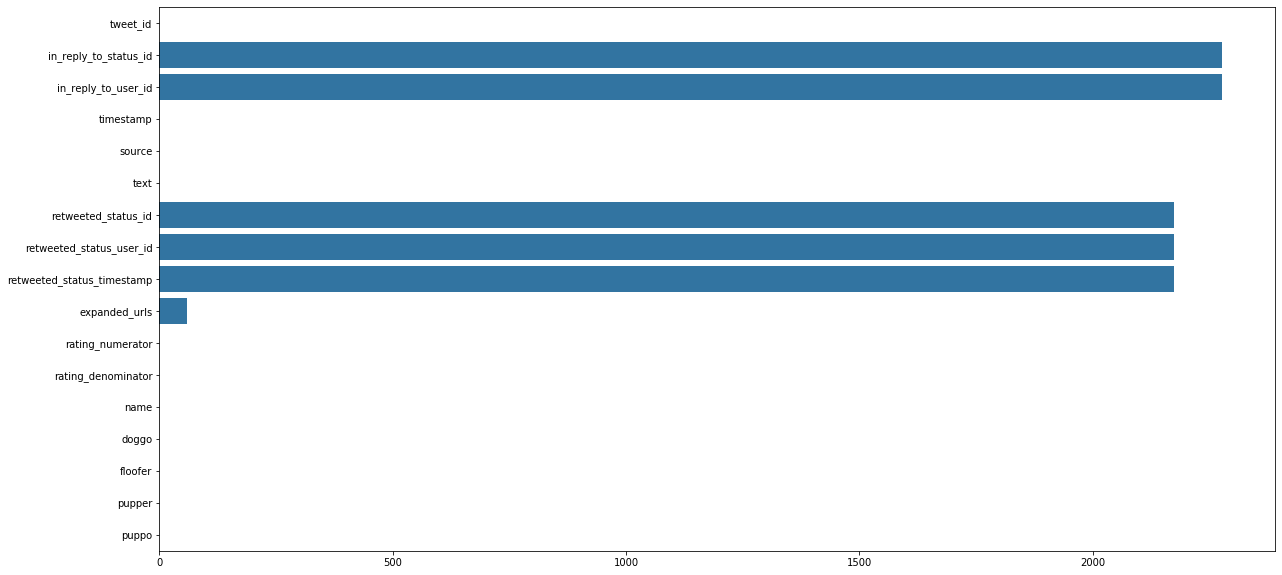

In [19]:
na_counts = df.isna().sum()
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,10))
sns.barplot( na_counts,na_counts.index.values, color = base_color);

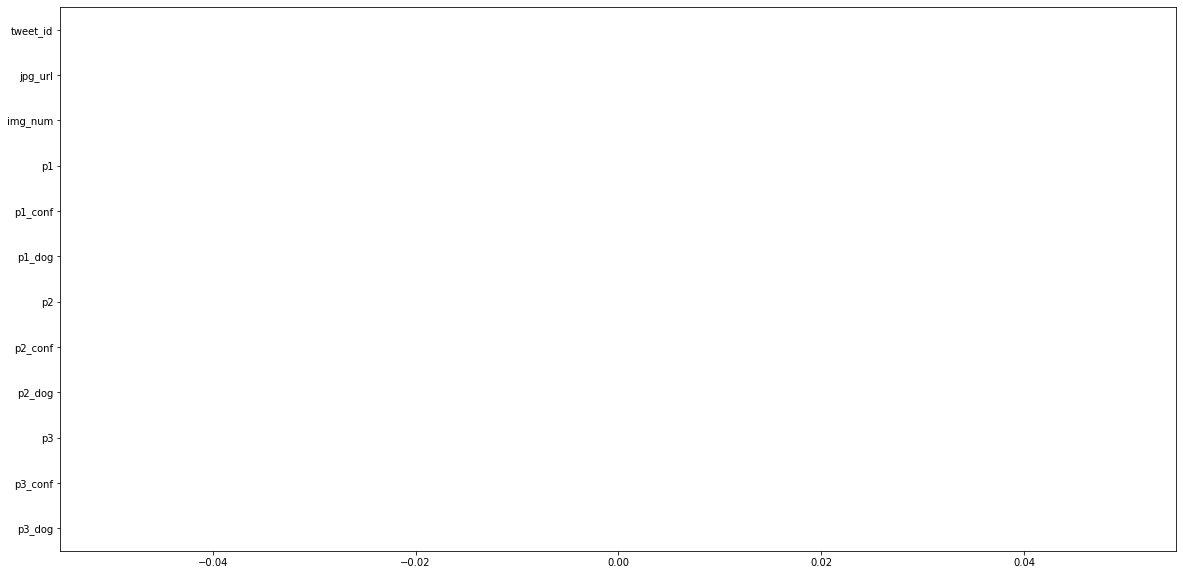

In [20]:
na_counts = df_pred.isna().sum()
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,10))
sns.barplot( na_counts,na_counts.index.values, color = base_color);

> Data extracted from the api seem incomplete. There are a lot of missing values.

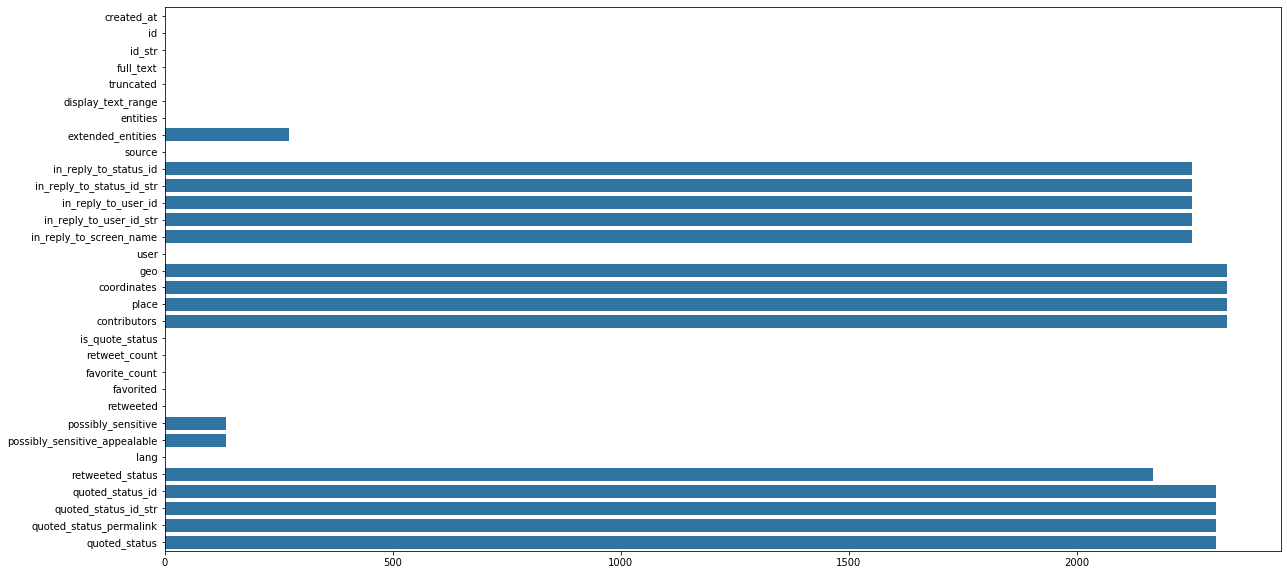

In [21]:
na_counts = df_api.isna().sum()
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,10))
sns.barplot( na_counts,na_counts.index.values, color = base_color);

<h3>Test</h3>

In [22]:
print(df.count())
print('----------------------------')
print(df_pred.count())
print('----------------------------')
print(df_api.count())

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64
----------------------------
tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64
----------------------------
created_at                       2331
id                               2331
id_str                           2331
ful

<ul>
<li>Consolidate the data in one or maximal two dataframes</li>
<li>Select the required columns</li>
<li> Filter the retweets </li>
<li>Handle the missing values</li>
<li>The data extracted from the tweeter api are not tidy </li>
<li>The user column of the api dataframe contains id and id<-str</li>
<li>The extended_entities column contains two fields  </li>
<li>The date fields should be treated as such  </li>

</ul>

<h1>Phase 3: Cleaning the data</h1>

<h3>Define</h3>
<p>Based on the issues listed below i clean the dataset </p>

<ul>
<li>I correct the date types of the dataframes.</li>
<li>There is no need to handle missing values since this is going to affect the integrity of the data.</li>
<li>I create a copy of the three dataframes before starting the cleaning phase</li>

</ul>

In [23]:
# A function to reuse
def parse_date(dateFrame):
    dateFrame = pd.to_datetime(dateFrame)
    return dateFrame

<h3>Code</h3>

In [24]:
df_clean = df.copy()
df_api_clean = df_api.copy()
df_pred_clean = df_pred.copy()


In [25]:
df_clean.sample(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                             source                                               text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                  expanded_urls  rating_numerator  rating_denominator name doggo floofer pupper puppo
2212  668587383441514497                    NaN                  NaN  2015-11-23 00:30:28 +0000  <a href="http://vine.co" rel="nofollow">Vine -...  Never forget this vine. You will not stop watc...                  NaN                       NaN                        NaN  https://vine.co/v/ea0OwvPTx9l                13                  10  the  None    None   None  None

In [26]:
df_clean =df_clean[['tweet_id','timestamp','source','expanded_urls','rating_numerator','rating_denominator','name','pupper']]


In [27]:
# Type correction for date
df_clean['timestamp'] = parse_date(df_clean['timestamp'])

In [28]:
res = pd.merge(df_clean, df_pred_clean, left_on ='tweet_id', right_on ='tweet_id' , how = 'left')

In [29]:
res.shape

(2356, 19)

> I have 2356 tweets after the merging of the read csv and the prediction file.

> I need to choose which attributes to extract from the tweeter api dataframe.
> I also need to extract the user_id from the user column which contains duplicated informations.

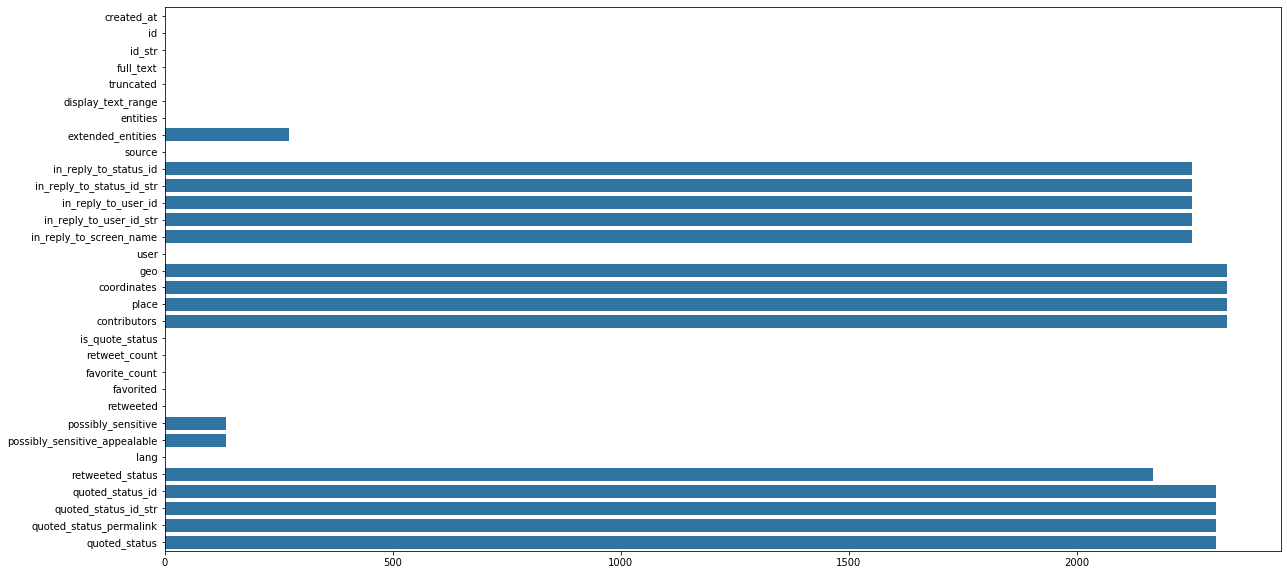

In [30]:
na_counts = df_api_clean.isna().sum()
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,10))
sns.barplot( na_counts,na_counts.index.values, color = base_color);

In [31]:
df_api_clean.sample(1)

created_at                  id              id_str                                          full_text  truncated display_text_range                                           entities                                  extended_entities                                             source  in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str in_reply_to_screen_name                                               user  geo  coordinates place  contributors  is_quote_status  retweet_count  favorite_count  favorited  retweeted possibly_sensitive possibly_sensitive_appealable lang retweeted_status  quoted_status_id  quoted_status_id_str quoted_status_permalink quoted_status
995  Sat Jun 25 19:42:08 +0000 2016  746790600704425984  746790600704425984  When you just can't resist... 10/10 topnotch t...      False            [0, 51]  {'hashtags': [], 'symbols': [], 'user_mentions...  {'media': [{'id': 746790588880674817, 'id_str'...  <a href="http://twitter.com/download/iphone" r...                    NaN                        NaN                  NaN                      NaN                     NaN  {'id': 4196983835, 'id_str': '4196983835', 'na...  NaN          NaN   NaN           NaN            False           1618            4934      False      False              False                         False   en              NaN               NaN                   NaN                     NaN           NaN

In [32]:
df_api_clean = df_api_clean[['created_at','entities','favorite_count','id','is_quote_status','retweet_count','retweeted','source','user','truncated']]

In [33]:
# Type correction for created_at
df_api_clean['created_at'] = parse_date(df_api_clean['created_at'])

In [34]:
df_api_clean['user_id']  =df_api_clean['user'].str.extract('(\d+)')
df_api_clean.sample(1)

created_at                                           entities  favorite_count                  id  is_quote_status  retweet_count  retweeted                                             source                                               user  truncated     user_id
1153 2016-04-12 01:51:36+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...            4571  719704490224398336            False           1442      False  <a href="http://twitter.com/download/iphone" r...  {'id': 4196983835, 'id_str': '4196983835', 'na...      False  4196983835

<h3>Test</h3>

In [35]:
df_api_clean = df_api_clean[['created_at','favorite_count','id','is_quote_status','retweet_count','retweeted','source','user_id','truncated']]

In [36]:
df_api_clean.tail(1)

created_at  favorite_count                  id  is_quote_status  retweet_count  retweeted                                             source     user_id  truncated
2330 2015-11-15 22:32:08+00:00            2446  666020888022790149            False            469      False  <a href="http://twitter.com/download/iphone" r...  4196983835      False

In [37]:
res.sample(1)

tweet_id                 timestamp                                             source                                      expanded_urls  rating_numerator  rating_denominator     name pupper                                          jpg_url  img_num           p1   p1_conf p1_dog                   p2   p2_conf p2_dog          p3   p3_conf p3_dog
2120  670411370698022913 2015-11-28 01:18:21+00:00  <a href="http://twitter.com/download/iphone" r...  https://twitter.com/dog_rates/status/670411370...                12                  10  Scooter   None  https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg      1.0  Maltese_dog  0.584397   True  miniature_schnauzer  0.064201   True  toy_poodle  0.060868   True

In [38]:
res_api = pd.merge(res, df_api_clean, left_on ='tweet_id', right_on ='id' , how = 'right')

In [39]:
res_api.head(3)

tweet_id                 timestamp                                           source_x                                      expanded_urls  rating_numerator  rating_denominator     name pupper                                          jpg_url  img_num         p1   p1_conf p1_dog        p2   p2_conf p2_dog        p3   p3_conf p3_dog                created_at  favorite_count                  id  is_quote_status  retweet_count  retweeted                                           source_y     user_id  truncated
0  892420643555336193 2017-08-01 16:23:56+00:00  <a href="http://twitter.com/download/iphone" r...  https://twitter.com/dog_rates/status/892420643...                13                  10  Phineas   None  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0     orange  0.097049  False     bagel  0.085851  False    banana  0.076110  False 2017-08-01 16:23:56+00:00           36596  892420643555336193            False           7789      False  <a href="http://twitter.com/download/iphone" r...  4196983835      False
1  892177421306343426 2017-08-01 00:17:27+00:00  <a href="http://twitter.com/download/iphone" r...  https://twitter.com/dog_rates/status/892177421...                13                  10    Tilly   None  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  Chihuahua  0.323581   True  Pekinese  0.090647   True  papillon  0.068957   True 2017-08-01 00:17:27+00:00           31531  892177421306343426            False           5769      False  <a href="http://twitter.com/download/iphone" r...  4196983835      False
2  891815181378084864 2017-07-31 00:18:03+00:00  <a href="http://twitter.com/download/iphone" r...  https://twitter.com/dog_rates/status/891815181...                12                  10   Archie   None  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0  Chihuahua  0.716012   True  malamute  0.078253   True    kelpie  0.031379   True 2017-07-31 00:18:03+00:00           23756  891815181378084864            False           3818      False  <a href="http://twitter.com/download/iphone" r...  4196983835      False

In [40]:
res_api.shape

(2331, 28)

In [41]:
res_api.to_csv('twitter_archive_master.csv.')

<p>We have consolidated all information in a dataframe</p>

<h1>documentation of analysis and insights into the data </h1>

In [42]:
res_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 28 columns):
tweet_id              2331 non-null int64
timestamp             2331 non-null datetime64[ns, UTC]
source_x              2331 non-null object
expanded_urls         2272 non-null object
rating_numerator      2331 non-null int64
rating_denominator    2331 non-null int64
name                  2331 non-null object
pupper                2331 non-null object
jpg_url               2059 non-null object
img_num               2059 non-null float64
p1                    2059 non-null object
p1_conf               2059 non-null float64
p1_dog                2059 non-null object
p2                    2059 non-null object
p2_conf               2059 non-null float64
p2_dog                2059 non-null object
p3                    2059 non-null object
p3_conf               2059 non-null float64
p3_dog                2059 non-null object
created_at            2331 non-null datetime64[ns, UTC]
favori

<h3>Exploring with the hist function</h3>

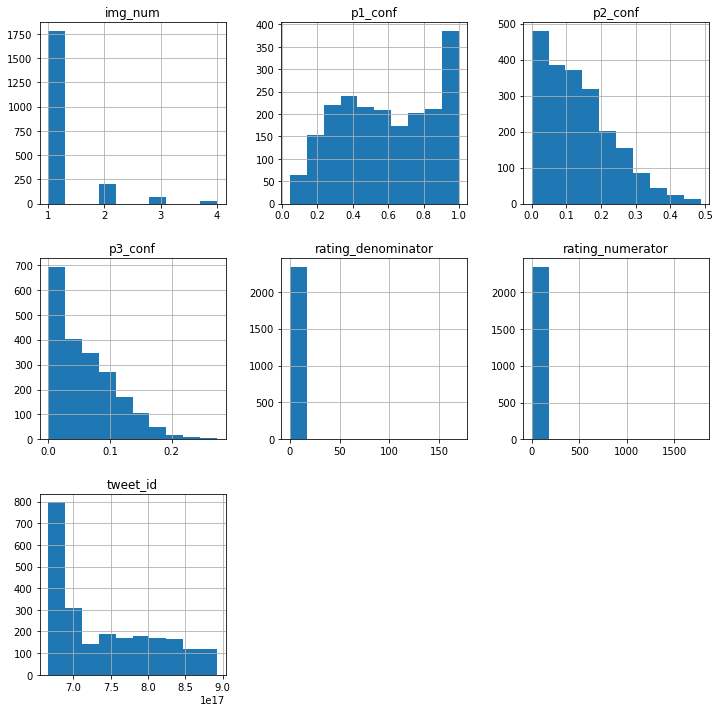

In [43]:
res.hist(figsize=(12,12));

In [44]:
# Filtering out the first retweeted
res_api = res_api[res_api['retweeted']== False]

In [45]:
res_api.shape

(2331, 28)

<h2> Feature engineering </h2>

> Creating a rating attribute

In [46]:
# Create a rating column based on the division
res_api['rating'] = res_api['rating_numerator'] / res_api['rating_denominator']
res_api.sample(3)

tweet_id                 timestamp                                           source_x                                      expanded_urls  rating_numerator  rating_denominator        name pupper                                            jpg_url  img_num          p1   p1_conf p1_dog                       p2   p2_conf p2_dog          p3   p3_conf p3_dog                created_at  favorite_count                  id  is_quote_status  retweet_count  retweeted                                           source_y     user_id  truncated  rating
1722  679111216690831360 2015-12-22 01:28:25+00:00  <a href="http://twitter.com/download/iphone" r...  https://twitter.com/dog_rates/status/679111216...                12                  10  officially   None  https://pbs.twimg.com/ext_tw_video_thumb/67911...      1.0      kelpie  0.189423   True                   beagle  0.121988   True      basset  0.121171   True 2015-12-22 01:28:25+00:00            5984  679111216690831360            False           2581      False  <a href="http://twitter.com/download/iphone" r...  4196983835      False     1.2
427   819347104292290561 2017-01-12 00:55:47+00:00  <a href="http://twitter.com/download/iphone" r...  https://twitter.com/dog_rates/status/819347104...                12                  10        Anna   None    https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg      3.0  Rottweiler  0.909106   True  black-and-tan_coonhound  0.044120   True    Doberman  0.031835   True 2017-01-12 00:55:47+00:00            7407  819347104292290561            False           1242      False  <a href="http://twitter.com/download/iphone" r...  4196983835      False     1.2
1719  679158373988876288 2015-12-22 04:35:49+00:00  <a href="http://twitter.com/download/iphone" r...  https://twitter.com/dog_rates/status/679158373...                11                  10       Rubio   None    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg      1.0         pug  0.272205   True             bull_mastiff  0.251530   True  bath_towel  0.116806  False 2015-12-22 04:35:49+00:00           21444  679158373988876288            False           8074      False  <a href="http://twitter.com/download/iphone" r...  4196983835      False     1.1

<p>Summarizing the Numerical data</p>
<ul>
<li> The rating numerator  </li>
<li>The rating denumerator</li>
<li>The favorite count</li>
<li>The retweet count  </li>
<li> p1_conf is how confident the algorithm is in its  prediction   </li>
<li> p2_conf is how confident the algorithm is in its  prediction   </li>
<li> p3_conf is how confident the algorithm is in its  prediction   </li>
</ul>

<p>Summarizing the categorical data </p>
<ul>
<li>The name  ; ) </li>
<li>The predicted classes: p1, p2, p3    </li>

</ul>

<h3>Returning the class with the highest confidence. For that I compare the confidence returnes by each algorithm</h3>

In [47]:
#Returning the maximal confidence
res_api['max_conf'] =res_api[['p1_conf','p2_conf','p3_conf']].max(axis= 1)

In [48]:
res_api.shape

(2331, 30)

<p> We need to consider that some classes specified that the picture is not one of a dog . Some tweets are simply not classified. </p>

In [49]:
res_api_p1 = res_api.query('p1_conf == max_conf').query('p1_dog == True')
res_api_p1.shape

(1520, 30)

In [50]:
res_api_p2 = res_api.query('p2_conf == max_conf').query('p2_dog == True')
res_api_p2.shape

(0, 30)

In [51]:
res_api_p3 = res_api.query('p3_conf == max_conf').query('p3_dog == True')
res_api_p3.shape

(0, 30)

> The first algorithm is the most reliable according to the level of confidence.

<h3>What are the most retweeted classes of dogs ?</h3>

In [52]:
#res_api.groupby('p1' ,as_index = False)['retweet_count'].count().plot(kind ='bar', title ='')
#plt.xlabel('')
res_api_p1.groupby('p1' ,as_index = False)['retweet_count'].count().sort_values(by=['retweet_count'] , ascending = False)

p1  retweet_count
87                 golden_retriever            150
35               Labrador_retriever             97
47                         Pembroke             88
15                        Chihuahua             81
99                              pug             57
79                             chow             44
53                          Samoyed             42
106                      toy_poodle             38
48                       Pomeranian             38
93                         malamute             30
81                   cocker_spaniel             30
22                   French_bulldog             25
14         Chesapeake_Bay_retriever             23
95               miniature_pinscher             23
23                  German_shepherd             20
58                   Siberian_husky             20
13                         Cardigan             19
70                           beagle             18
39                      Maltese_dog             18
59        Staffordshire_bullterrier             18
21                       Eskimo_dog             18
56                Shetland_sheepdog             18
57                         Shih-Tzu             17
36                 Lakeland_terrier             17
50                       Rottweiler             17
33                Italian_greyhound             16
92                           kuvasz             16
27                   Great_Pyrenees             14
66      West_Highland_white_terrier             14
46                         Pekinese             13
84                        dalmatian             13
69                           basset             13
108                          vizsla             13
45             Old_English_sheepdog             12
1                          Airedale             12
8                     Border_collie             12
2    American_Staffordshire_terrier             12
103     soft-coated_wheaten_terrier             11
7                  Blenheim_spaniel             11
90                           kelpie             11
75                            boxer             10
6              Bernese_mountain_dog             10
101                      schipperke             10
19                 English_springer             10
82                           collie             10
74                           borzoi              9
10                      Boston_bull              9
94                         malinois              9
109                         whippet              9
26                       Great_Dane              9
96                 miniature_poodle              8
67                Yorkshire_terrier              8
43               Norwegian_elkhound              8
98                         papillon              8
17                         Doberman              8
85            flat-coated_retriever              8
18                   English_setter              8
104                 standard_poodle              8
42                  Norfolk_terrier              7
72                       bloodhound              7
9                    Border_terrier              7
12                 Brittany_spaniel              7
68                          basenji              7
51                    Saint_Bernard              7
24      German_short-haired_pointer              7
30                     Irish_setter              6
31                    Irish_terrier              6
16                   Dandie_Dinmont              6
100                         redbone              6
63                     Walker_hound              5
61                  Tibetan_mastiff              5
38                            Lhasa              5
41                     Newfoundland              5
5                Bedlington_terrier              5
77                     bull_mastiff              5
0                      Afghan_hound              4
73                         bluetick              4
64                       Weimaraner              4
62  

<p> According to p1 the most retweeted sorts of dogs are: </p>
<ul>
<li>golden_retriever</li>
<li>Labrador_retriever</li>
<li>Pembroke</li>
</ul>


<p>The less popular dogs:</p>
    <ul>
    <li> Scotch_terrier  </li>
     <li>  clumber </li>
        <li> Japanese_spaniel</li>
    </ul>
<p> These dog species are possibly rare or simply unpopular. </p>

<h3>What types of dogs do have on average the best rating ?</h3>

In [53]:
res_api_p1.groupby('p1' ,as_index = False)['rating'].mean().sort_values(by=['rating'] , ascending = False)

p1    rating
80                          clumber  2.700000
48                       Pomeranian  1.286842
52                           Saluki  1.250000
61                  Tibetan_mastiff  1.240000
76                           briard  1.233333
9                    Border_terrier  1.214286
92                           kuvasz  1.206250
86                  giant_schnauzer  1.200000
105              standard_schnauzer  1.200000
102                   silky_terrier  1.200000
30                     Irish_setter  1.183333
21                       Eskimo_dog  1.177778
25                    Gordon_setter  1.175000
53                          Samoyed  1.173810
87                 golden_retriever  1.169645
79                             chow  1.163636
13                         Cardigan  1.152632
27                   Great_Pyrenees  1.150000
4                Australian_terrier  1.150000
110         wire-haired_fox_terrier  1.150000
90                           kelpie  1.145455
47                         Pembroke  1.144318
42                  Norfolk_terrier  1.142857
81                   cocker_spaniel  1.140000
28       Greater_Swiss_Mountain_dog  1.133333
32              Irish_water_spaniel  1.133333
37                         Leonberg  1.133333
50                       Rottweiler  1.129412
7                  Blenheim_spaniel  1.127273
58                   Siberian_husky  1.125000
17                         Doberman  1.125000
22                   French_bulldog  1.124000
6              Bernese_mountain_dog  1.120000
45             Old_English_sheepdog  1.116667
46                         Pekinese  1.115385
69                           basset  1.115385
43               Norwegian_elkhound  1.112500
106                      toy_poodle  1.110526
35               Labrador_retriever  1.110309
82                           collie  1.110000
60                   Sussex_spaniel  1.100000
64                       Weimaraner  1.100000
107                     toy_terrier  1.100000
19                 English_springer  1.100000
23                  German_shepherd  1.100000
3                       Appenzeller  1.100000
20                      EntleBucher  1.100000
91                         komondor  1.100000
78                            cairn  1.100000
101                      schipperke  1.090000
93                         malamute  1.090000
85            flat-coated_retriever  1.087500
108                          vizsla  1.084615
2    American_Staffordshire_terrier  1.083333
31                    Irish_terrier  1.083333
36                 Lakeland_terrier  1.082353
14         Chesapeake_Bay_retriever  1.078261
15                        Chihuahua  1.075309
40                 Mexican_hairless  1.075000
104                 standard_poodle  1.075000
16                   Dandie_Dinmont  1.066667
94                         malinois  1.066667
95               miniature_pinscher  1.065217
75                            boxer  1.060000
8                     Border_collie  1.058333
59        Staffordshire_bullterrier  1.055556
57                         Shih-Tzu  1.052941
67                Yorkshire_terrier  1.050000
73                         bluetick  1.050000
0                      Afghan_hound  1.050000
66      West_Highland_white_terrier  1.050000
71          black-and-tan_coonhound  1.050000
70                           beagle  1.044444
109                         whippet  1.044444
74                           borzoi  1.044444
72                       bloodhound  1.042857
24      German_short-haired_pointer  1.042857
12                 Brittany_spaniel  1.042857
77                     bull_mastiff  1.040000
38                            Lhasa  1.040000
56                Shetland_sheepdog  1.038889
83           curly-coated_retriever  1.033333
55               Scottish_deerhound  1.033333
99                              pug  1.031579
68                          basenji  1.028571
89                         keeshond  1.025000
41                     Newfound

<p>
The dogs which have the best rating on average are:
</p>
<ul>
<li>clumber  </li>
<li>  Pomeranian</li>
<li> Saluki </li>
</ul>

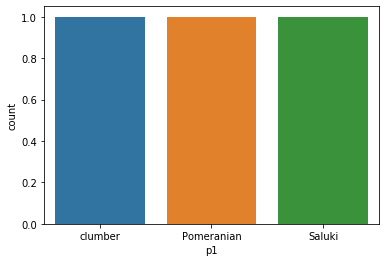

In [67]:
pop_rating = res_api_p1.groupby('p1' ,as_index = False)['rating'].mean().sort_values(by=['rating'] , ascending = False).head(3)
pop_rating
sns.countplot(data = pop_rating, x = 'p1');


In [54]:
res_api_final = res_api.drop(['expanded_urls', 'p3','p3_conf','source_y','jpg_url','created_at','id','source_x'], axis=1)

In [55]:
res_api['pupper'].value_counts()

None      2076
pupper     255
Name: pupper, dtype: int64

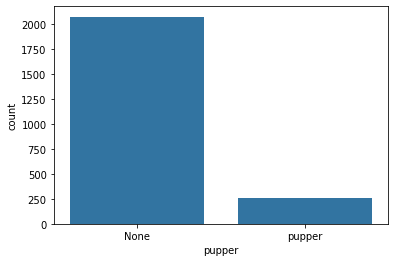

In [56]:
base_color = sns.color_palette()[0]
sns.countplot(data = res_api, x = 'pupper', color = base_color)

> Pupper dogs are the smaller categories

<h1> Correlation: is there a relationship betweet favorite count and number of retweets ? </h1>

/home/yannick/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


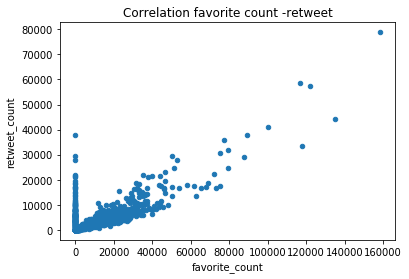

In [59]:
res_api.plot(x='favorite_count' , y='retweet_count' , kind = 'scatter' ,title='Correlation favorite count -retweet');


> There is a positive correlation betweet the number of retweets and the favorite_count .